In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [20]:
csv_path = "../data/spotify_dataset_sin_duplicados_4.csv"
df = pd.read_csv(csv_path)


In [18]:
def process(df):
    df["Loudness (db)"] = df["Loudness (db)"].str.replace("db", "", regex=False).astype(float)
    df["Length_sec"] = pd.to_timedelta("00:" + df["Length"]).dt.total_seconds().astype(int)
    df = df.drop(columns=["Length"])
    return df
def get_typos(df, tolerancia):
    categorical_cols = [col for col in df.select_dtypes(include=['object']).columns 
                    if df[col].nunique() < tolerancia]

    # Identificar columnas textuales (object con muchas categorías o strings largos)
    textual_cols = [col for col in df.select_dtypes(include=['object']).columns 
                    if df[col].nunique() >= tolerancia]
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    return categorical_cols, textual_cols, numeric_cols

### Distribución de tipos de datos

Nos enfocaremos en tolerancia, que representa la cantidad de datos distintos de los datos como tipo objeto 

In [ ]:
tolerancia = 100
# Identificar columnas categóricas (dtype = object pero con pocas categorías)
categorical_cols, textual_cols, numeric_cols = get_typos(df, 30)

In [6]:
print("Total de columnas: ", len(df.columns))
print(f"Columnas categóricas ({len(categorical_cols)}):", categorical_cols)
print(f"Columnas textuales ({len(textual_cols)}):", textual_cols)
print(f"Columnas numéricas ({len(numeric_cols)}): ", numeric_cols)


Total de columnas:  41
Columnas categóricas (4): ['emotion', 'Key', 'Time signature', 'Explicit']
Columnas textuales (16): ['Artist(s)', 'song', 'text', 'Length', 'Genre', 'Album', 'Release Date', 'Loudness (db)', 'Similar Artist 1', 'Similar Song 1', 'Similar Artist 2', 'Similar Song 2', 'Similar Artist 3', 'Similar Song 3', 'song_normalized', 'artist_normalized']
Columnas numéricas (21):  ['Tempo', 'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness', 'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation', 'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine', 'Similarity Score 1', 'Similarity Score 2', 'Similarity Score 3']


### Verificación manual de los tipos de las columnas 

In [7]:
i = 0
for col, val in df.iloc[i].items():
    print(f"{col}: {val}")

Artist(s): !!!
song: Even When the Waters Cold
text: Friends told her she was better off at the bottom of a river Than in a bed with him He said "Until you try both, you won't know what you like better Why don't we go for a swim?" Well, friends told her this and friends told her that But friends don't choose what echoes in your head When she got bored with all the idle chit-and-chat Kept thinking 'bout what he said  I'll swim even when the water's cold That's the one thing that I know Even when the water's cold  She remembers it fondly, she doesn't remember it all But what she does, she sees clearly She lost his number, and he never called But all she really lost was an earring The other's in a box with others she has lost I wonder if she still hears me  I'll swim even when the water's cold That's the one thing that I know Even when the water's cold If you believe in love You know that sometimes it isn't Do you believe in love? Then save the bullshit questions Sometimes it is and somet

In [8]:
# Numerical 
numerical_by_human = [
    "Length", 
    "Tempo",
    "Loudness (db)",
    "Popularity",
    "Energy",
    "Danceability",
    "Positiveness",
    "Speechiness",
    "Liveness",
    "Acousticness",
    "Instrumentalness",
    "Good for Party",
    "Good for Work/Study",
    "Good for Relaxation/Meditation",
    "Good for Exercise",
    "Good for Running",
    "Good for Yoga/Stretching",
    "Good for Driving",
    "Good for Social Gatherings",
    "Good for Morning Routine",
    "Similarity Score 1",
    "Similarity Score 2",
    "Similarity Score 3",
]

# Duditas

dudas = [
    "Release Date",
]


# Elementos en numerical_by_human pero NO en numeric_cols
faltan_en_df = set(numerical_by_human) - set(numeric_cols)

# Elementos en numeric_cols pero NO en numerical_by_human
sobran_en_df = set(numeric_cols) - set(numerical_by_human)

print(f"Numerica by human ({len(numerical_by_human)})")
print(f"Numeric cols del df ({len(numeric_cols)})")

print("Atributos definidos y no encontrados en df:", faltan_en_df)
print("Atributos encontrados en df y no definidos manualmente:", sobran_en_df)

coinciden = set(numerical_by_human) & set(numeric_cols)

print(f"Cantidad de atributos iguales: {len(coinciden)}")


Numerica by human (23)
Numeric cols del df (21)
Atributos definidos y no encontrados en df: {'Length', 'Loudness (db)'}
Atributos encontrados en df y no definidos manualmente: set()
Cantidad de atributos iguales: 21
Atributos que coinciden: {'Similarity Score 2', 'Liveness', 'Good for Party', 'Danceability', 'Tempo', 'Similarity Score 1', 'Energy', 'Good for Exercise', 'Popularity', 'Good for Morning Routine', 'Good for Work/Study', 'Good for Driving', 'Good for Relaxation/Meditation', 'Acousticness', 'Good for Running', 'Positiveness', 'Good for Yoga/Stretching', 'Instrumentalness', 'Good for Social Gatherings', 'Similarity Score 3', 'Speechiness'}


Entonces  {'Length', 'Loudness (db)'} son datos numerícos

In [21]:
df = process(df)

Observar los tipos de datos encontrados y ya revisado manualmente (revisión completa en datos numéricos)

In [24]:

tolerancias = [10, 20, 50, 1000, 10000]

categoricas = []
textuales   = []
numericas   = []

for tol in tolerancias:
    categorical_cols, textual_cols, numeric_cols = get_typos(df, tol)
    print(f"################ Probando con tolerancia ({tol}) #########")
    # print("Total de columnas: ", len(df.columns))
    print(f"Columnas categóricas ({len(categorical_cols)}):", categorical_cols)
    print(f"Columnas textuales ({len(textual_cols)}):", textual_cols)
    print(f"Columnas numéricas ({len(numeric_cols)}): ", numeric_cols)
    categoricas.append(len(categorical_cols))
    textuales.append(len(textual_cols))
    numericas.append(len(numeric_cols))



################ Probando con tolerancia (10) #########
Columnas categóricas (3): ['emotion', 'Time signature', 'Explicit']
Columnas textuales (15): ['Artist(s)', 'song', 'text', 'Genre', 'Album', 'Release Date', 'Key', 'Similar Artist 1', 'Similar Song 1', 'Similar Artist 2', 'Similar Song 2', 'Similar Artist 3', 'Similar Song 3', 'song_normalized', 'artist_normalized']
Columnas numéricas (23):  ['Tempo', 'Loudness (db)', 'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness', 'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation', 'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine', 'Similarity Score 1', 'Similarity Score 2', 'Similarity Score 3', 'Length_sec']
################ Probando con tolerancia (20) #########
Columnas categóricas (3): ['emotion', 'Time signature', 'Explicit']
Columnas textuales (15): ['A

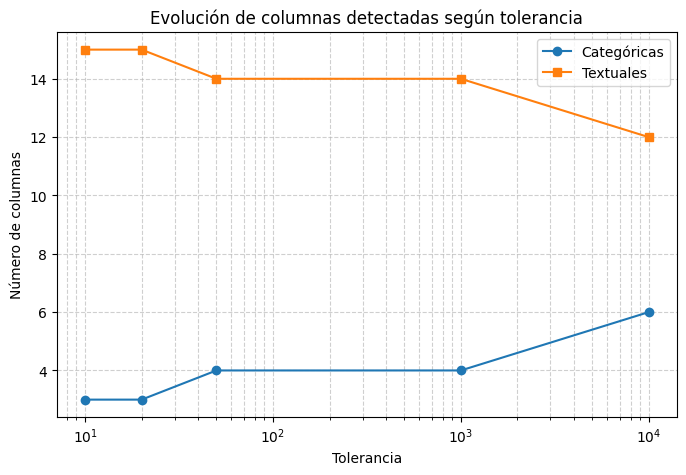

In [26]:
plt.figure(figsize=(8,5))

plt.plot(tolerancias, categoricas, marker='o', label="Categóricas")
plt.plot(tolerancias, textuales, marker='s', label="Textuales")
# plt.plot(tolerancias, numericas, marker='^', label="Numéricas")

plt.xscale("log")  # Escala logarítmica para tolerancia (por los saltos grandes)
plt.xlabel("Tolerancia")
plt.ylabel("Número de columnas")
plt.title("Evolución de columnas detectadas según tolerancia")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)

plt.show()